In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
fake = pd.read_csv('/content/drive/MyDrive/SOFT Eng Project/bangla dataset/Fake-1K.csv')
#true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BanglaDataset/LabeledAuthentic-7K.csv',index_col=0)
true = pd.read_csv('/content/drive/MyDrive/SOFT Eng Project/bangla dataset/LabeledAuthentic-7K.csv',index_col=0)

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 53.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=2233e8928c7d8c05c21f97d15a07e2785c6234cded6b5aeb374efe4b40572459
  Stored in directory: /root/.cache/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
  Created wheel for gensim: filename=gensim-4.0.1-cp39-cp39-linux_x86_64.whl size=26057785 sha256=c73ac4774589b184db96135e7a4f9018f0e110c26fa14a7511212a7b7a4365b3


In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report

*Then* we add a flag to track fake and real

In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
fake.head()

,articleID,domain,date,category,headline,content,label,target
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,fake
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,fake
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,fake
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,fake
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,fake


In [ ]:
true.head()

,domain,date,category,source,relation,headline,content,label,target
articleID,,,,,,,,,
1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,true
2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,true
3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,true
4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,true
5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,true


Concatinate Dataset

In [ ]:
data = pd.concat([fake, true])

In [ ]:
from google.colab import files
data.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.head(20)

,articleID,domain,date,category,headline,content,label,target,source,relation
0,1.0,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0.0,fake,NaN,NaN
1,2.0,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0.0,fake,NaN,NaN
2,3.0,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0.0,fake,NaN,NaN
3,4.0,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0.0,fake,NaN,NaN
4,5.0,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0.0,fake,NaN,NaN
5,6.0,channeldhaka.news,2018-12-24T18:17:50+00:00,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,0.0,fake,NaN,NaN
6,7.0,earki.com,2019-03-14T02:33:32+00:00,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",0.0,fake,NaN,NaN
7,8.0,motikontho.wordpress.com,2011-06-19T07:12:21+00:00,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,0.0,fake,NaN,NaN
8,10.0,bengaliviralnews.com,2018-01-03T17:21:14+00:00,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,0.0,fake,NaN,NaN
9,11.0,motikontho.wordpress.com,2015-02-22T14:45:30+00:00,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,0.0,fake,NaN,NaN


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.drop(["label"],axis=1,inplace=True)
data.drop(["domain"],axis=1,inplace=True)
data.drop(["relation"],axis=1,inplace=True)
data.drop(["source"],axis=1,inplace=True)

In [ ]:
data.head(20)

,articleID,category,headline,content,target
0,1.0,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",fake
1,2.0,Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",fake
2,3.0,Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,fake
3,4.0,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,fake
4,5.0,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",fake
5,6.0,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,fake
6,7.0,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",fake
7,8.0,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,fake
8,10.0,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,fake
9,11.0,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,fake


target
fake    1299
true    7202
Name: headline, dtype: int64


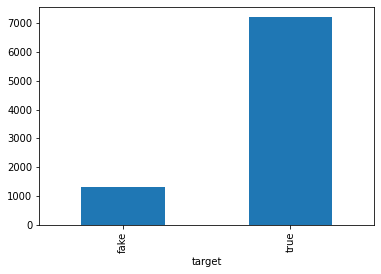

In [ ]:
from matplotlib import pyplot as plt
print(data.groupby(['target'])['headline'].count())
data.groupby(['target'])['headline'].count().plot(kind="bar")
plt.show()

We will shuffle the data to prevent bias:


In [ ]:
data= data.sample(frac = 1)

In [ ]:
data.head(20)

,articleID,category,headline,content,target
1139,NaN,Sports,শিশু পরিচর্যা কেন্দ্রের কর্মীর ছুরিকাঘাতে আহত ৫,যুক্তরাষ্ট্রের নিউইয়র্কে একটি শিশু পরিচর্যা কে...,true
121,NaN,Crime,কুমিল্লার মামলায় খালেদার জামিন শুনানি পেছাল,কুমিল্লার চৌদ্দগ্রামে বাসে আগুন দিয়ে আটজন হত্য...,true
2193,NaN,Entertainment,২০১৯ সালের আগস্টে আসছে জনের ‘বাটলা হাউজ’,জন আব্রাহামের নতুন সিনেমা ‘বাটলা হাউজ’। শুক্রব...,true
6551,NaN,National,কুষ্টিয়ায় অনির্দিষ্টকালের পরিবহন ধর্মঘট শুরু,সড়ক পরিবহন আইন পাসের প্রতিবাদে কুষ্টিয়া-প্রাগপ...,true
7578,NaN,International,"ফিলিপিন্সে ভূমিধসে নিহত ২২, মোবাইল বার্তায় বাঁ...",ধ্বংসস্তুপের নিচে চাপা পড়া কয়েকজন মোবাইল ফোন থ...,true
2598,NaN,National,রাজৈরে বিপুল পরিমাণ জাল টাকাসহ আটক ১,মাদারীপুরের রাজৈরে বিপুল পরিমাণ জাল টাকা ও তৈর...,true
5896,NaN,Politics,২১ আগস্ট মামলার রায় নিয়ে বিএনপির শঙ্কা,২১ আগস্ট গ্রেনেড হামলা মামলায় ন্যায়বিচার হওয়া ...,true
5836,NaN,International,জলঢাকায় সন্তানের বিরুদ্ধে মাকে নির্যাতনের অভিযোগ,নীলফামারীর জলঢাকায় বুধবার গভীর রাতে সন্তানের হ...,true
6971,NaN,National,মেহেরপুরে শিক্ষকদের অনুপস্থিতির কারণে ব্যাহত হ...,শিক্ষকদের অনুপস্থিতির কারণে পাঠদান ব্যাহত হচ্ছ...,true
5309,NaN,International,তুরাগ নদী থেকে উদ্ধার হওয়া দুই তরুণীর মরদেহ সন...,আশুলিয়ায় তুরাগ নদী থেকে ভাসমান অবস্থায় উদ্ধার ...,true


Removing the date and label

Stopwords and Punctuations

In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits


**Remove** stopwords, punctuation and digit

In [ ]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in (punctuations)]
    clean_str = ''.join(all_list)
    return clean_str
data['headline'] = data['headline'].apply(punctuation_removal)
print(data['headline'])

1139      শিশু পরিচর্যা কেন্দ্রের কর্মীর ছুরিকাঘাতে আহত ৫
121           কুমিল্লার মামলায় খালেদার জামিন শুনানি পেছাল
2193             ২০১৯ সালের আগস্টে আসছে জনের ‘বাটলা হাউজ’
6551         কুষ্টিয়ায় অনির্দিষ্টকালের পরিবহন ধর্মঘট শুরু
7578    ফিলিপিন্সে ভূমিধসে নিহত ২২ মোবাইল বার্তায় বাঁচ...
                              ...                        
1097    ছয় নম্বর বাসে ১৫টাকা ভাড়ায় বাসায় ফিরলেন তা...
3464    ১৪০ কিমি পথ পাড়ি দিয়ে ফের মাঠে বাংলাদেশ ২১ সেপ...
4607    গাজীপুরে জোড়া খুন মাদ্রাসা পরিচালকের তিন দিনের...
333     সম্ভাব্য যে ৭টি কারণে জয়া আহসানের পরিবার হুট ক...
1421                             ঢাকার যানজটের সমাধান বাস
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def stopword_removal(text):
    all_list = [char for char in text if char not in stopwords]
    clean_str = ''.join(all_list)
    return clean_str
data['headline'] = data['headline'].apply(stopword_removal)
print(data['headline'])

1139             শিশু পিচ্যা কেন্দ্ে ক্মী ছুিকাঘাতে আহত ৫
121             কুমিল্লা মামলায় খালেদা জামিন শুনানি পেছাল
2193               ২০১৯ সালে আগস্টে আসছে জনে ‘বাটলা হাউজ’
6551              কুষ্টিয়ায় অনি্দিষ্টকালে পিবহন ধ্মঘট শুু
7578    ফিলিপিন্সে ভূমিধসে নিহত ২২ মোবাল বা্তায় বাঁচান...
                              ...                        
1097    ছয় নম্ব বাসে ১৫টাকা ভাড়ায় বাসায় ফিলেন তাান...
3464    ১৪০ কিমি পথ পাড়ি দিয়ে ফে মাঠে বাংলাদেশ ২১ সেপ্...
4607    গাজীপুে জোড়া খুন মাদ্াসা পিচালকে তিন দিনে িমান...
333     সম্ভাব্য যে ৭টি কাণে জয়া আহসানে পিবা হুট কে তা...
1421                               ঢাকা যানজটে সমাধান বাস
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def digit_removal(text):
    all_list = [char for char in text if char not in digits]
    clean_str = ''.join(all_list)
    return clean_str
data['headline'] = data['headline'].apply(digit_removal)
print(data['headline'])

1139              শিশু পিচ্যা কেন্দ্ে ক্মী ছুিকাঘাতে আহত 
121             কুমিল্লা মামলায় খালেদা জামিন শুনানি পেছাল
2193                    সালে আগস্টে আসছে জনে ‘বাটলা হাউজ’
6551              কুষ্টিয়ায় অনি্দিষ্টকালে পিবহন ধ্মঘট শুু
7578    ফিলিপিন্সে ভূমিধসে নিহত  মোবাল বা্তায় বাঁচানো ...
                              ...                        
1097    ছয় নম্ব বাসে টাকা ভাড়ায় বাসায় ফিলেন তাানা ...
3464      কিমি পথ পাড়ি দিয়ে ফে মাঠে বাংলাদেশ  সেপ্টেম্ব  
4607    গাজীপুে জোড়া খুন মাদ্াসা পিচালকে তিন দিনে িমান...
333     সম্ভাব্য যে টি কাণে জয়া আহসানে পিবা হুট কে তাক...
1421                               ঢাকা যানজটে সমাধান বাস
Name: headline, Length: 8501, dtype: object


Tokenize Dataset

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data["headline"] = data["headline"].apply(lambda x: stem_words(x))
print(data["headline"])

1139               শিশু পিচ্যা কেন্দ্ে ক্মী ছুিকাঘাতে আহত
121             কুমিল্লা মামলায় খালেদা জামিন শুনানি পেছাল
2193                    সালে আগস্টে আসছে জনে ‘বাটলা হাউজ’
6551              কুষ্টিয়ায় অনি্দিষ্টকালে পিবহন ধ্মঘট শুু
7578    ফিলিপিন্সে ভূমিধসে নিহত মোবাল বা্তায় বাঁচানো আ...
                              ...                        
1097    ছয় নম্ব বাসে টাকা ভাড়ায় বাসায় ফিলেন তাানা ...
3464         কিমি পথ পাড়ি দিয়ে ফে মাঠে বাংলাদেশ সেপ্টেম্ব
4607    গাজীপুে জোড়া খুন মাদ্াসা পিচালকে তিন দিনে িমান...
333     সম্ভাব্য যে টি কাণে জয়া আহসানে পিবা হুট কে তাক...
1421                               ঢাকা যানজটে সমাধান বাস
Name: headline, Length: 8501, dtype: object


In [ ]:
import pandas as pd
import nltk
a = data['headline'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
word_dist.most_common(50)
#print (word_dist)

[('’', 625),
 ('‘', 543),
 ('না', 451),
 ('নিহত', 325),
 ('থেকে', 259),
 ('কে', 253),
 ('নিয়ে', 239),
 ('দু', 234),
 ('আটক', 212),
 ('হবে', 199),
 ('প্ধানমন্ত্ী', 196),
 ('দৈনিক', 193),
 ('মতিকণ্ঠ', 192),
 ('প', 188),
 ('বাংলাদেশ', 188),
 ('bengal', 181),
 ('beat', 181),
 ('মৃত্যু', 179),
 ('বিনপি', 174),
 ('খালেদা', 168),
 ('হত্যা', 160),
 ('সঙ্গে', 156),
 ('কা', 156),
 ('সেপ্টেম্ব', 149),
 ('উদ্ধা', 147),
 ('ক', 141),
 ('টাকা', 141),
 ('শুু', 138),
 ('বাংলাদেশে', 137),
 ('কতে', 136),
 ('যে', 127),
 ('জন্য', 124),
 ('নে', 119),
 ('আ', 118),
 ('হচ্ছে', 112),
 ('টি', 112),
 ('গ্েফতা', 110),
 ('শিশু', 109),
 ('বন্ধ', 109),
 ('ভাতে', 106),
 ('মামলা', 103),
 ('নতুন', 102),
 ('দিয়ে', 102),
 ('নেতা', 102),
 ('বিুদ্ধে', 98),
 ('অভিযোগ', 98),
 ('সিনহা', 98),
 ('বা', 97),
 ('সড়ক', 96),
 ('ডিজিটাল', 95)]

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Convert the label column from string to integer
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])

In [ ]:
X = data['headline'].astype(str)
y = data['target'].astype(int)

In [ ]:
# Apply one-hot encoding to the target variable
y = pd.get_dummies(y).values

plot the confusion matrix

In [ ]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(data['headline'], data.target, test_size=0.2, random_state=42)

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (11512, 200)
y_train shape: (11512, 2)
X_test shape: (1701, 200)
y_test shape: (1701, 2)


In [ ]:
X_train.count()

6800

In [ ]:
X_test.count()

1701

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the input data sequences
max_length = 200
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Apply undersampling to balance the class distribution
undersample = RandomUnderSampler()
X_train, y_train = undersample.fit_resample(X_train, y_train)

In [ ]:
from keras.utils import to_categorical
# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras import activations

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import tensorflow as tf

import keras

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, Activation, RepeatVector, Bidirectional, LSTM, Dropout, Embedding
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.losses import sparse_categorical_crossentropy
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import collections

from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras import activations

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Define the Bidirectional LSTM model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(256, dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2, return_sequences=True)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(2, activation='softmax'))

Vectorizing and applying TF-IDF

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Epoch 1/10
180/180 [==============================] - 335s 2s/step - loss: 0.4542 - accuracy: 0.7655 - val_loss: 0.3753 - val_accuracy: 0.9165
Epoch 2/10
180/180 [==============================] - 248s 1s/step - loss: 0.1908 - accuracy: 0.9298 - val_loss: 0.3738 - val_accuracy: 0.8801
Epoch 3/10
180/180 [==============================] - 243s 1s/step - loss: 0.1198 - accuracy: 0.9691 - val_loss: 0.3153 - val_accuracy: 0.9001
Epoch 4/10
180/180 [==============================] - 245s 1s/step - loss: 0.0421 - accuracy: 0.9889 - val_loss: 0.3287 - val_accuracy: 0.8959
Epoch 5/10
180/180 [==============================] - 244s 1s/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.3243 - val_accuracy: 0.8948
Epoch 6/10
180/180 [==============================] - 247s 1s/step - loss: 0.0211 - accuracy: 0.9946 - val_loss: 0.4206 - val_accuracy: 0.8783
Epoch 7/10
180/180 [==============================] - 248s 1s/step - loss: 0.0180 - accuracy: 0.9952 - val_loss: 0.5324 - val_accuracy: 0.8571

In [ ]:
model.save_weights('/content/drive/MyDrive/SOFT Eng Project/model/model_Bi_LSTM_2_weights_bangla.h5')
model.save('/content/drive/MyDrive/SOFT Eng Project/model/model_Bi_LSTM_2_architecture_Bangla.h5')


In [ ]:

import pickle
import os

filename = 'BI_LSTM_bangla.pkl'
path = '/content/drive/MyDrive/SOFT Eng Project/model/' + filename

with open(path, 'wb') as file:
    pickle.dump(model, file)

# Check if the file was saved correctly
if os.path.exists(path):
    print('Model saved successfully to Google Drive:', path)
else:
    print('Error: Model could not be saved to Google Drive.')


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......bidirectional_1
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......conv1d
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
y_hat = model.predict(X_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

54/54 [==============================] - 13s 193ms/step
Test Loss: 0.40436863899230957
Test Accuracy: 0.8800705671310425


In [ ]:
y_pred_classes = np.where(y_hat >= 0.5)
y_pred_classes

(array([   0,    1,    2, ..., 1698, 1699, 1700]),
 array([0, 1, 1, ..., 1, 1, 1]))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy score and confusion matrix
acc_score = accuracy_score(y_test, y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)

print('Accuracy Score: ', acc_score)
print('Confusion Matrix: \n', cm)

ValueError: ignored

In [ ]:
# print classification report
print(classification_report(y_test, np.where(y_hat >= 0.5, 1, 0)))

In [ ]:
#plot the confusion matrix
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred_classes), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [ ]:

cr = classification_report(y_test, prediction)
print(confusion_matrix(y_test, prediction))
print("\n\nClassification Report\n")
print(cr)

[[ 104  173]
 [  25 1399]]


Classification Report

              precision    recall  f1-score   support

        fake       0.81      0.38      0.51       277
        true       0.89      0.98      0.93      1424

    accuracy                           0.88      1701
   macro avg       0.85      0.68      0.72      1701
weighted avg       0.88      0.88      0.87      1701



In [ ]:
cr = classification_report(y_test, prediction2)
print(confusion_matrix(y_test, prediction2))
print("\n\nClassification Report\n")
print(cr)

[[ 106  171]
 [  14 1410]]


Classification Report

              precision    recall  f1-score   support

        fake       0.88      0.38      0.53       277
        true       0.89      0.99      0.94      1424

    accuracy                           0.89      1701
   macro avg       0.89      0.69      0.74      1701
weighted avg       0.89      0.89      0.87      1701

